In [3]:
import sys
import os
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import json
import torch
import torchvision
import torchvision.transforms as T
from timm import create_model
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD
from time import sleep

In [4]:
model_name = "convnext_xlarge_in22k"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("device = ", device)
# create a ConvNeXt model : https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/convnext.py
model = create_model(model_name, pretrained=True).to(device)

device =  cpu


In [5]:
size = 256

# Here we resize smaller edge to 256, no center cropping
transforms = [
              T.Resize(size, interpolation=T.InterpolationMode.BICUBIC),
              T.ToTensor(),
              T.Normalize(IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD),
              ]

transforms = T.Compose(transforms)

In [6]:
imagenet_labels = json.load(open('label_to_words.json'))

In [7]:
hen_labels = json.load(open('hen_names.json'))
for dirname, _, filenames in os.walk('raw-img'):
    for filename in filenames:
        path, folder = os.path.split(dirname)
        if filename == '.DS_Store':
            continue
        print(dirname+'/'+filename)
        img = PIL.Image.open(dirname+'/'+filename)
        img_tensor = transforms(img).unsqueeze(0).to(device)
        
        output = torch.softmax(model(img_tensor), dim=1)
        top1 = torch.topk(output, k=1)
        top1_prob = top1.values[0]
        top1_indices = top1.indices[0]
        label = imagenet_labels[str(int(top1_indices[0]))]
        hen_names = [x.lower() for x in hen_labels.values()]
        
        labels = label.lower().split(',')
        labels = [x.strip() for x in labels]
        for label in labels:
            if label in hen_names:
#                 print('found')
                break;
            else:
                print(label.lower())
        

raw-img/gallina/OIP-50vmhkNIM1LKU3JoYIRmegHaFj.jpeg
raw-img/gallina/OIP-o6-uEWaNg5X6y_zYuX-uCAHaEK.jpeg
raw-img/gallina/OIP-jOW7_xA-oCSNQ9qqQUvx8QHaFj.jpeg
raw-img/gallina/689.jpeg
raw-img/gallina/OIP-QvhpBc8aDmocG5LSaZGhyQHaF7.jpeg
raw-img/gallina/OIP-2AW-Ey2pmwe-sVfbVAiXZAHaHa.jpeg
raw-img/gallina/OIP-baEUeCGLa1AOlZjTCWl2zgHaHV.jpeg
raw-img/gallina/OIP-dDLjPFqnq6cpeejLPqEj-QHaGx.jpeg
raw-img/gallina/OIP-wRqurTlqsPVnsjETnOEDegHaGc.jpeg
raw-img/gallina/OIP-gIFlKBqxwsbC9wN8E7-eYQHaE7.jpeg
raw-img/gallina/666.jpeg
raw-img/gallina/tz4npjmcfw3uzxdbs81.jpg
raw-img/gallina/OIP-QQOjltuNh0wqkXkfO6yCtAHaHa.jpeg
raw-img/gallina/OIP-ppHc8CzLOQx9tnbeC4p6bgHaIM.jpeg
raw-img/gallina/236.jpeg
raw-img/gallina/OIP-uoYtaNjuM3dq1jLSMVrSpgHaFj.jpeg
poultryman
poulterer
raw-img/gallina/OIP-tfpN2mDEqLwXt6v6-1m0zQHaF7.jpeg
raw-img/gallina/OIP-b3OVM5sQs3NX9ZqvZTejuwHaEN.jpeg
raw-img/gallina/OIP-YTRdAUfaVbsSu6DB2klLfwHaG_.jpeg
raw-img/gallina/OIP-TcKLuJNvZ6pZe3DxZo3D7wHaHa.jpeg
raw-img/gallina/OIP-raSHAiMYHu7c

KeyboardInterrupt: 

red jungle fowl, Gallus gallus 12.48%
cockerel 10.17%
captive 9.19%
domestic fowl, fowl, poultry 6.16%
gamecock, fighting cock 4.77%


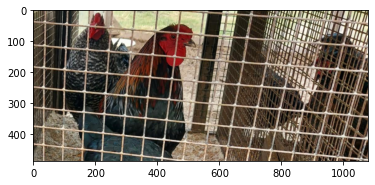

In [16]:
img = PIL.Image.open('raw-img/gallina/u0pa3o-afhcm50y8rs81.jpg')
img_tensor = transforms(img).unsqueeze(0).to(device)

# inference
output = torch.softmax(model(img_tensor), dim=1)
top5 = torch.topk(output, k=5)
top5_prob = top5.values[0]
top5_indices = top5.indices[0]

for i in range(5):
    labels = imagenet_labels[str(int(top5_indices[i]))]
    prob = "{:.2f}%".format(float(top5_prob[i])*100)
    print(labels, prob)

plt.imshow(img)

[(0.0, 29.0)]

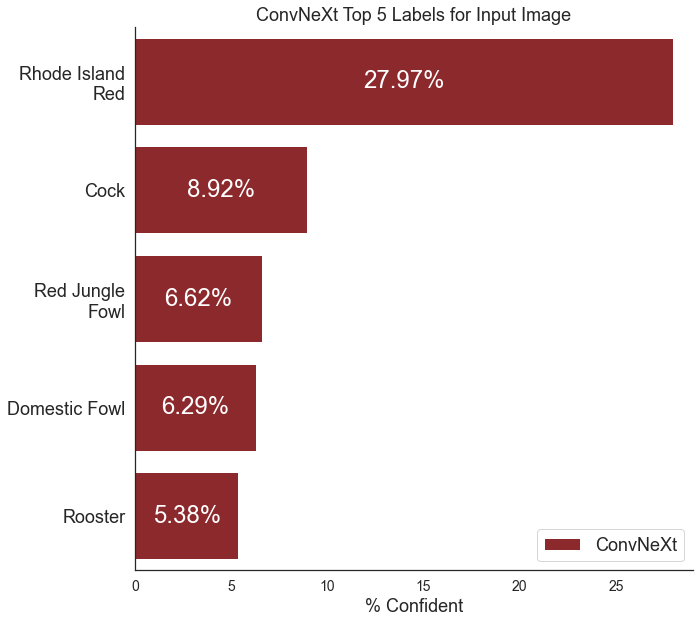

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_theme(style = "white")

f, ax = plt.subplots(figsize=(10,10))

data = {"Label": ["Rhode Island\nRed", "Cock", "Red Jungle\nFowl", "Domestic Fowl", "Rooster"], 
        "Percent Confident": [27.97, 8.92, 6.62, 6.29, 5.38]}

data = pd.DataFrame(data)
# sns.set(font_scale=1.5)
ax = sns.set_color_codes("deep")
ax = sns.barplot(x="Percent Confident", y="Label", data = data, label="ConvNeXt", color="#9c191e")
ax.bar_label(ax.containers[0], fmt="%.2f%%", fontsize=24, label_type='center', color="#fff")
ax.legend(ncol=1, loc="lower right", frameon=True, fontsize=18)
sns.despine(right=True)
plt.xlabel("% Confident", fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel("")
plt.yticks(fontsize=18)
plt.title("ConvNeXt Top 5 Labels for Input Image", fontsize=18)
ax.set(xlim=(0,29))